In [1]:
import sys
import os


sys.path.append(os.path.join('..', '..', 'utils'))
sys.path.append(os.path.join('..', '..'))

import utils
import torch

from torchvision import datasets
import torchvision.transforms as T
import models

from conf import global_settings as settings
from utils_train import dataset_loader

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
utils.setup_seed(0)

In [3]:
training_loader, test_loader, perm = dataset_loader(
    'cifar10',
    settings.CIFAR10_TRAIN_MEAN,
    settings.CIFAR10_TRAIN_STD,
    num_workers = 4,
    batch_size = 32,
    shuffle=True,
    shuffle_pixels = True
)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
img = next(iter(training_loader))[0][0]

img.shape

torch.Size([3, 32, 32])

In [5]:
img_ordered = perm.ordenar(img.unsqueeze(0)).squeeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


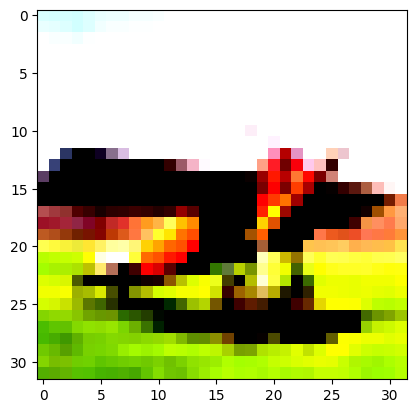

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img_ordered.permute(1,2,0))

In [6]:
%pip install torchinfo

You should consider upgrading via the 'c:\Users\nelso\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import sys
import os

sys.path.append(os.path.join('..', '..', 'utils'))
sys.path.append(os.path.join('..', '..'))


from torchinfo import summary
from models import vgg_permuted
import utils

perm = utils.Permutar(32,1)

vgg = vgg_permuted.vgg16_bn_deformable(perm,2)

summary(vgg, input_size=(2, 3, 32, 32))

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(2, 32, 32)
(2, 32, 32)
(2, 16, 16)
(2, 16, 16)
(2, 8, 8)
(2, 8, 8)
(2, 8, 8)
(2, 4, 4)
(2, 4, 4)
(2, 4, 4)
(2, 2, 2)
(2, 2, 2)
(2, 2, 2)


Layer (type:depth-idx)                   Output Shape              Param #
VGG_permuted                             [2, 100]                  --
├─DeformConv2d: 1-1                      [2, 64, 32, 32]           1,792
├─BatchNorm2d: 1-2                       [2, 64, 32, 32]           128
├─DeformConv2d: 1-3                      [2, 64, 32, 32]           36,928
├─BatchNorm2d: 1-4                       [2, 64, 32, 32]           128
├─DeformMaxPool2d: 1-5                   [2, 64, 16, 16]           --
├─DeformConv2d: 1-6                      [2, 128, 16, 16]          73,856
├─BatchNorm2d: 1-7                       [2, 128, 16, 16]          256
├─DeformConv2d: 1-8                      [2, 128, 16, 16]          147,584
├─BatchNorm2d: 1-9                       [2, 128, 16, 16]          256
├─DeformMaxPool2d: 1-10                  [2, 128, 8, 8]            --
├─DeformConv2d: 1-11                     [2, 256, 8, 8]            295,168
├─BatchNorm2d: 1-12                      [2, 256, 8, 8]     

In [7]:
import sys
import os

sys.path.append(os.path.join('..', '..', 'utils'))
sys.path.append(os.path.join('..', '..'))

import torch
import utils

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

my_tensor = torch.tensor([[1, 2, 3,4],
                       [5, 6,7,8],
                       [9,10,11,12],
                          [13,14,15,16]]).to(device).float()

my_tensor = my_tensor.unsqueeze(0).unsqueeze(0)

my_tensor = my_tensor.repeat(2,1,1,1)

perm = utils.Permutar(4,1)

my_tensor_permuted = perm.desordenar(my_tensor)

In [8]:
result,perm = utils.deform_maxPool2d(my_tensor_permuted,perm,2)
result

tensor([[[[16.,  8.],
          [ 6., 14.]]],


        [[[16.,  8.],
          [ 6., 14.]]]])

In [12]:
perm.ordenar(result)

tensor([[[[ 6.,  8.],
          [14., 16.]]],


        [[[ 6.,  8.],
          [14., 16.]]]])

In [9]:
from torch import nn

m = nn.MaxPool2d(2)
m(my_tensor)

tensor([[[[ 6.,  8.],
          [14., 16.]]],


        [[[ 6.,  8.],
          [14., 16.]]]])